In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('netflix_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [83]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [84]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

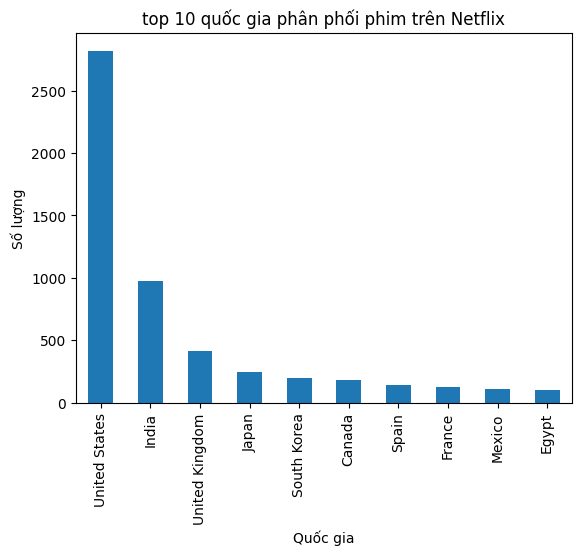

In [85]:
country_count = df['country'].value_counts().head(10)

country_count.plot(kind='bar', title='top 10 quốc gia phân phối phim trên Netflix')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng')
plt.show()

In [86]:
director_counts = df['director'].value_counts().head(10)

print(director_counts)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [87]:
cast_counts = df['cast'].value_counts().head(10)

print(cast_counts)

cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath  

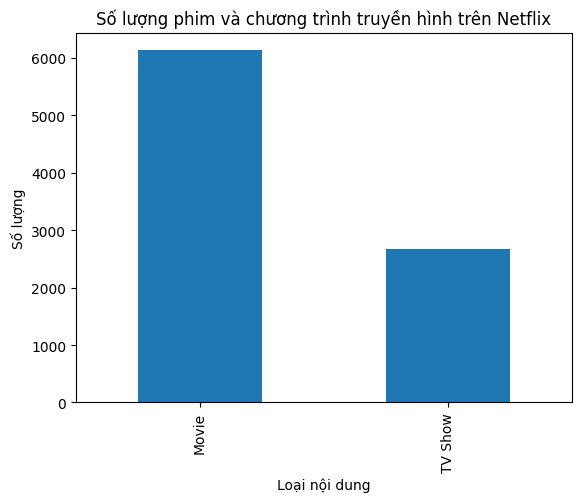

In [88]:
content_types = df['type'].value_counts()

content_types.plot(kind='bar', title='Số lượng phim và chương trình truyền hình trên Netflix')
plt.xlabel('Loại nội dung')
plt.ylabel('Số lượng')
plt.show()

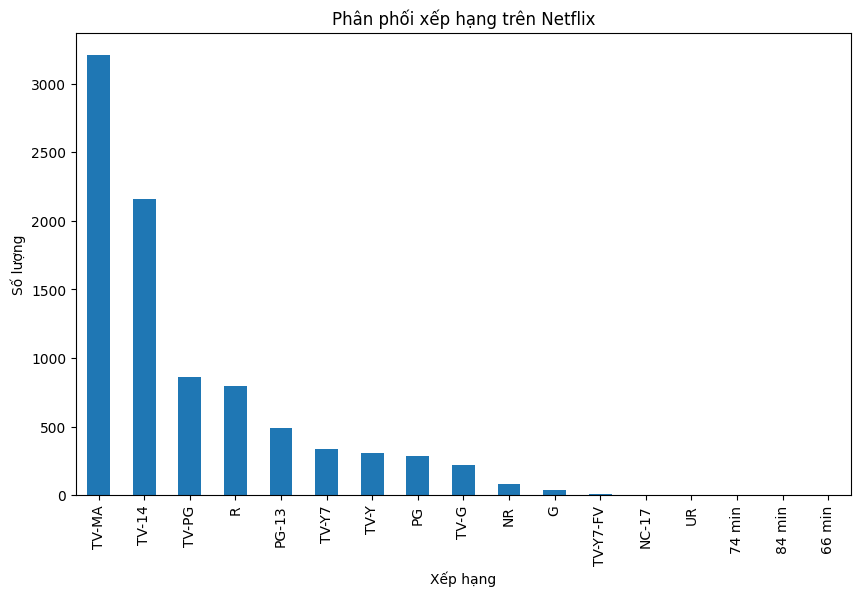

In [89]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', title='Phân phối xếp hạng trên Netflix')
plt.xlabel('Xếp hạng')
plt.ylabel('Số lượng')
plt.show()

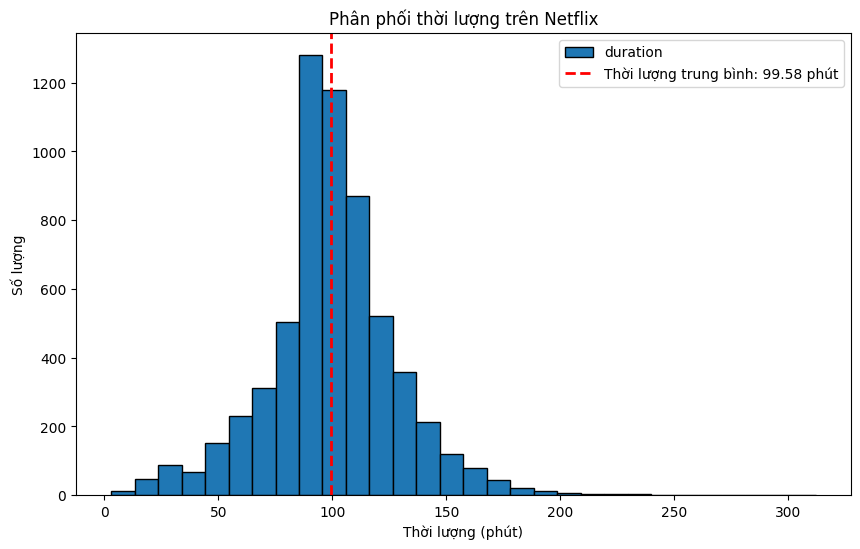

In [90]:
df['duration'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce')

average_duration = df['duration'].mean()

plt.figure(figsize=(10, 6))
df['duration'].plot(kind='hist', bins=30, edgecolor='k', title='Phân phối thời lượng trên Netflix')
plt.xlabel('Thời lượng (phút)')
plt.ylabel('Số lượng')
plt.axvline(average_duration, color='r', linestyle='dashed', linewidth=2, label=f'Thời lượng trung bình: {average_duration:.2f} phút')
plt.legend()
plt.show()

In [91]:
listed_in_counts = df['listed_in'].value_counts().head(10)

print(listed_in_counts)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [92]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
from nltk.tokenize import word_tokenize
from collections import Counter

descriptions = ' '.join(df['description'])

tokens = word_tokenize(descriptions)
word_counts = Counter(tokens)

common_words = word_counts.most_common(10)
print(common_words)

[('a', 10110), ('.', 9511), (',', 8875), ('the', 7717), ('to', 6345), ('and', 6329), ('of', 5279), ('in', 3702), ('his', 3345), ('her', 2157)]


In [94]:
combined_features = df.groupby(['cast', 'director']).size().reset_index(name='count')
combined_features = combined_features.sort_values(by='count', ascending=False)
combined_features.head(10)

,cast,director,count
5339,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Rajiv Chilaka,12
4128,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",S.S. Rajamouli,4
180,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Rathindran R Prasad,4
4129,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",S.S. Rajamouli,3
3157,Louis C.K.,Louis C.K.,3
4571,Sam Kinison,Walter C. Miller,3
4180,Rachael Stirling,Edward Cotterill,3
715,Bill Burr,Jay Karas,3
1222,Dave Chappelle,Stan Lathan,3
5058,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...",Ashwin Saravanan,3


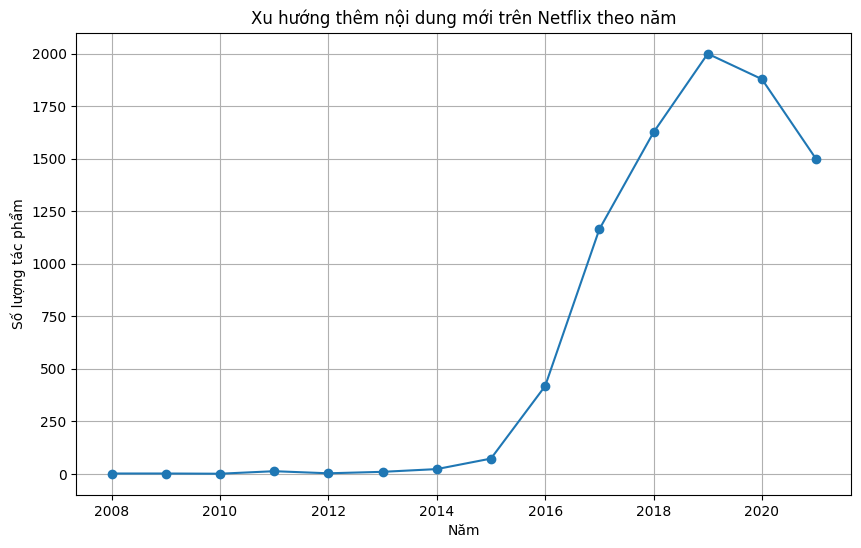

In [95]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year

data = df.dropna(subset=['year_added'])

year_added_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_added_counts.plot(kind='line', marker='o')
plt.title('Xu hướng thêm nội dung mới trên Netflix theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng tác phẩm')
plt.grid(True)
plt.show()

In [96]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [97]:
data = data.dropna(subset=['date_added'])

data['Year'] = data['date_added'].apply(lambda x: str(x)[:4])
data['Month'] = data['date_added'].apply(lambda x: str(x)[5:7])
data['Day'] = data['date_added'].apply(lambda x: str(x)[8:])
data['ds'] = pd.DatetimeIndex(data['Year']+'-'+data['Month']+'-'+data['Day'])

print(data[data['ds'].isna()])

data = data.dropna(subset=['ds'])

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year_added, Year, Month, Day, ds]
Index: []
